In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df1=pd.read_csv('test2.csv')

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 5 columns):
Unnamed: 0     4222 non-null int64
Customer_ID    4222 non-null int64
Date           4222 non-null object
Amount         4222 non-null int64
frequency      4222 non-null int64
dtypes: int64(4), object(1)
memory usage: 165.0+ KB


In [82]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [83]:
df2=df1
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 5 columns):
Unnamed: 0     4222 non-null int64
Customer_ID    4222 non-null int64
Date           4222 non-null datetime64[ns]
Amount         4222 non-null int64
frequency      4222 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 165.0 KB


In [84]:
sd = dt.datetime(2018,12,31)

In [85]:
df2['hist']=sd - df2['Date']
df2['hist'].astype('timedelta64[D]')
df2['hist']=df2['hist'] / np.timedelta64(1, 'D')
df2.head()

,Unnamed: 0,Customer_ID,Date,Amount,frequency,hist
0,1,5496,2018-08-01,176688,4,152.0
1,2,5497,2018-09-01,248054,3,121.0
2,3,5498,2018-10-01,166980,2,91.0
3,4,5499,2018-11-01,227480,1,60.0
4,5,5500,2018-12-01,125067,2,30.0


In [86]:
dfx=df2

In [87]:
max(df2['frequency'])

4

In [88]:
sum(df2['frequency'])/len(df2['frequency'])

2.484367598294647

In [89]:
rfmTable = df2.groupby('Customer_ID').agg({'hist': lambda x:x.min(), # Recency
                                        'frequency' : lambda x: x,               # Frequency
                                        'Amount': lambda x: x.sum()})          # Monetary Value


In [90]:
rfmTable.head()

,hist,frequency,Amount
Customer_ID,,,
5496,152.0,4,176688
5497,121.0,3,248054
5498,91.0,2,166980
5499,60.0,1,227480
5500,30.0,2,125067


In [91]:
max(rfmTable['frequency'])

4

In [92]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 5496 to 9717
Data columns (total 3 columns):
hist         4222 non-null float64
frequency    4222 non-null int64
Amount       4222 non-null int64
dtypes: float64(1), int64(2)
memory usage: 131.9 KB


In [28]:
rfmTable['frequency']=

In [93]:
max(rfmTable['frequency'])

4

In [94]:
rfmTable.rename(columns={'hist': 'recency', 
                         'frequency': 'frequency', 
                         'Amount': 'monetary_value'}, inplace=True)

In [95]:
rfmTable.head()

,recency,frequency,monetary_value
Customer_ID,,,
5496,152.0,4,176688
5497,121.0,3,248054
5498,91.0,2,166980
5499,60.0,1,227480
5500,30.0,2,125067


In [96]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25    207.0        1.0        85316.50
0.50    439.0        2.0       104644.50
0.75    763.0        3.0       129185.75 <class 'pandas.core.frame.DataFrame'>


In [97]:
quartiles=quartiles.to_dict()
quartiles

{'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'monetary_value': {0.25: 85316.5, 0.5: 104644.5, 0.75: 129185.75},
 'recency': {0.25: 207.0, 0.5: 439.0, 0.75: 763.0}}

In [98]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [99]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [100]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [101]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer_ID,,,,,,,
5496,152.0,4,176688,1,1,1,111
5497,121.0,3,248054,1,2,1,121
5498,91.0,2,166980,1,3,1,131
5499,60.0,1,227480,1,4,1,141
5500,30.0,2,125067,1,3,2,132


In [102]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer_ID,,,,,,,
6513,199.0,4,374531,1,1,1,111
6505,3.0,4,367507,1,1,1,111
6514,79.0,4,356089,1,1,1,111
5762,141.0,4,233355,1,1,1,111
6550,173.0,4,232829,1,1,1,111
5723,187.0,4,232507,1,1,1,111
5524,30.0,4,232463,1,1,1,111
6569,54.0,4,226986,1,1,1,111
5871,24.0,4,226871,1,1,1,111


In [103]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    179323.942857
112    114617.846154
113     92823.372881
114     73000.901961
121    181721.200000
122    117111.722222
123     93105.801587
124     72786.777778
131    190723.620690
132    120382.458333
133     92175.575000
134     74727.596491
141    190407.863636
142    119914.437500
143     93090.654930
144     72092.640000
211    180419.111111
212    113157.812500
213     94059.701149
214     65228.555556
221    175728.724638
222    114869.468750
223     93338.248000
224     67023.941176
231    173237.342466
232    115280.102564
233     93288.695652
234     60232.866667
241    171724.138889
242    114262.422222
243     94429.625000
244     66040.769231
311    155979.673469
312    113952.548673
313    101256.894737
314     44445.984375
321    161291.701754
322    113398.891089
323    101870.888889
324     44165.171875
331    159290.379310
332    113520.955357
333    101943.757576
334     43780.704225
341    161647.695652
342    113197.138211
343    100845.611111
344 

In [104]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 5496 to 9717
Data columns (total 8 columns):
recency           4222 non-null float64
frequency         4222 non-null int64
monetary_value    4222 non-null int64
R_Quartile        4222 non-null int64
F_Quartile        4222 non-null int64
M_Quartile        4222 non-null int64
RFMClass          4222 non-null object
Total Score       4222 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 296.9+ KB
             recency  frequency  monetary_value  R_Quartile  F_Quartile  \
Customer_ID                                                               
5496           152.0          4          176688           1           1   
5497           121.0          3          248054           1           2   
5498            91.0          2          166980           1           3   
5499            60.0          1          227480           1           4   
5500            30.0          2          125067           1           

In [105]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     179323.942857
4     175400.834437
5     137008.333333
6     128113.410437
7     114090.204790
8     104212.138889
9      95347.847076
10     75547.769679
11     48126.515337
12     52049.375000
Name: monetary_value, dtype: float64

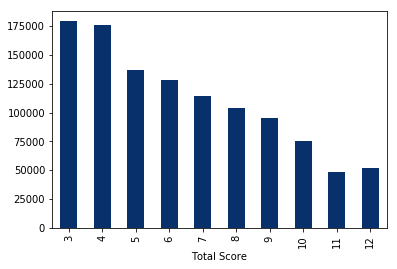

In [106]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

In [107]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
Customer_ID,,,,,,,,
5496,152.0,4,176688,1,1,1,111,3
5497,121.0,3,248054,1,2,1,121,4
5498,91.0,2,166980,1,3,1,131,5
5499,60.0,1,227480,1,4,1,141,6
5500,30.0,2,125067,1,3,2,132,6


In [108]:
rfmSeg.to_csv('rfm_set.csv')

In [111]:
df=rfmSeg

In [115]:
df.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score
Customer_ID,,,,,,,,
5496,152.0,4,176688,1,1,1,111,3
5497,121.0,3,248054,1,2,1,121,4
5498,91.0,2,166980,1,3,1,131,5
5499,60.0,1,227480,1,4,1,141,6
5500,30.0,2,125067,1,3,2,132,6


In [117]:
bins = [3, 4,6,7,8,11,12]
names = ['Best Customers','Big Spenders','Loyal Customers','Almost Lost','Lost Customers','Lost Cheap Customers']

df['price_point'] = pd.cut(df.Score, bins, labels=names)

In [114]:
df.rename(columns={'Total Score':'Score'},inplace=True)

In [118]:
df.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score,price_point
Customer_ID,,,,,,,,,
5496,152.0,4,176688,1,1,1,111,3,NaN
5497,121.0,3,248054,1,2,1,121,4,Best Customers
5498,91.0,2,166980,1,3,1,131,5,Big Spenders
5499,60.0,1,227480,1,4,1,141,6,Big Spenders
5500,30.0,2,125067,1,3,2,132,6,Big Spenders


In [119]:
df.drop(columns='price_point')

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score
Customer_ID,,,,,,,,
5496,152.0,4,176688,1,1,1,111,3
5497,121.0,3,248054,1,2,1,121,4
5498,91.0,2,166980,1,3,1,131,5
5499,60.0,1,227480,1,4,1,141,6
5500,30.0,2,125067,1,3,2,132,6
5501,352.0,2,129744,2,3,1,231,6
5502,351.0,1,233953,2,4,1,241,7
5503,350.0,4,158311,2,1,1,211,4
5504,349.0,2,121733,2,3,2,232,7


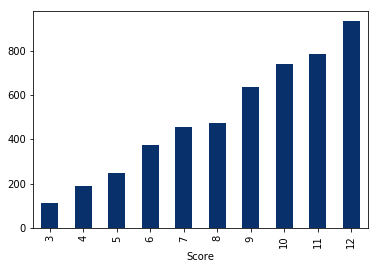

In [121]:
rfmSeg.groupby('Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

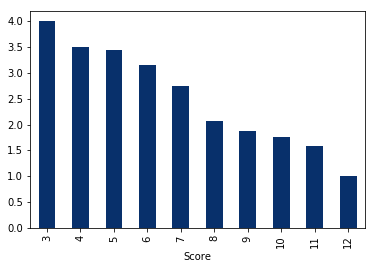

In [122]:
rfmSeg.groupby('Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')